In [490]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import scale
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import tensorflow as tf
sns.set()        
# Any results you write to the current directory are saved as output.

In [491]:
raw_train_data = pd.read_csv('../input/titanic/train.csv')
raw_test_data = pd.read_csv('../input/titanic/test.csv')

In [492]:
test_df = raw_test_data.copy()
train_df = raw_train_data.copy()
dfs = [train_df, test_df]

In [493]:
for dataset in dfs:
    print(dataset.info())
    print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-nul

In [494]:
# getting the number of empty cells for each colums
for dataset in dfs:
    print(dataset.isna().sum())
    print('\n')

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64




In [495]:
# Dealing with missing values
for df in dfs:
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    df['Embarked'].fillna('S', inplace=True) # For some reason df['Embarked'].mode() is not working

In [496]:
for df in dfs:
    print(df.info())
    print('\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-nul

In [497]:
# Making new insights/columns
for df in dfs:
    df['Family_size'] = df['SibSp'] + df['Parch'] + 1
    df['Is_alone'] = 0
    df['Title'] = df['Name'].map(lambda x : x.split(' ')[1])


In [498]:
for df in dfs:
    df['Is_alone'] = df['Family_size'].map(lambda x: 1 if x == 1 else 0)
    df['binned_age']= pd.qcut(df['Age'], q=4) #, [0,10,20,30,40,50,60,70,80,90])

In [499]:
train_df['binned_age'].value_counts()

(22.0, 28.0]     308
(0.419, 22.0]    231
(35.0, 80.0]     217
(28.0, 35.0]     135
Name: binned_age, dtype: int64

In [500]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size,Is_alone,Title,binned_age
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,2,0,Mr.,"(0.419, 22.0]"
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2,0,Mrs.,"(35.0, 80.0]"
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1,1,Miss.,"(22.0, 28.0]"
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2,0,Mrs.,"(28.0, 35.0]"
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1,1,Mr.,"(28.0, 35.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1,1,Rev.,"(22.0, 28.0]"
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1,1,Miss.,"(0.419, 22.0]"
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,NaN,S,4,0,Miss.,"(22.0, 28.0]"
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1,1,Mr.,"(22.0, 28.0]"


In [ ]:
sns.pairplot(train_df)

plt.show()

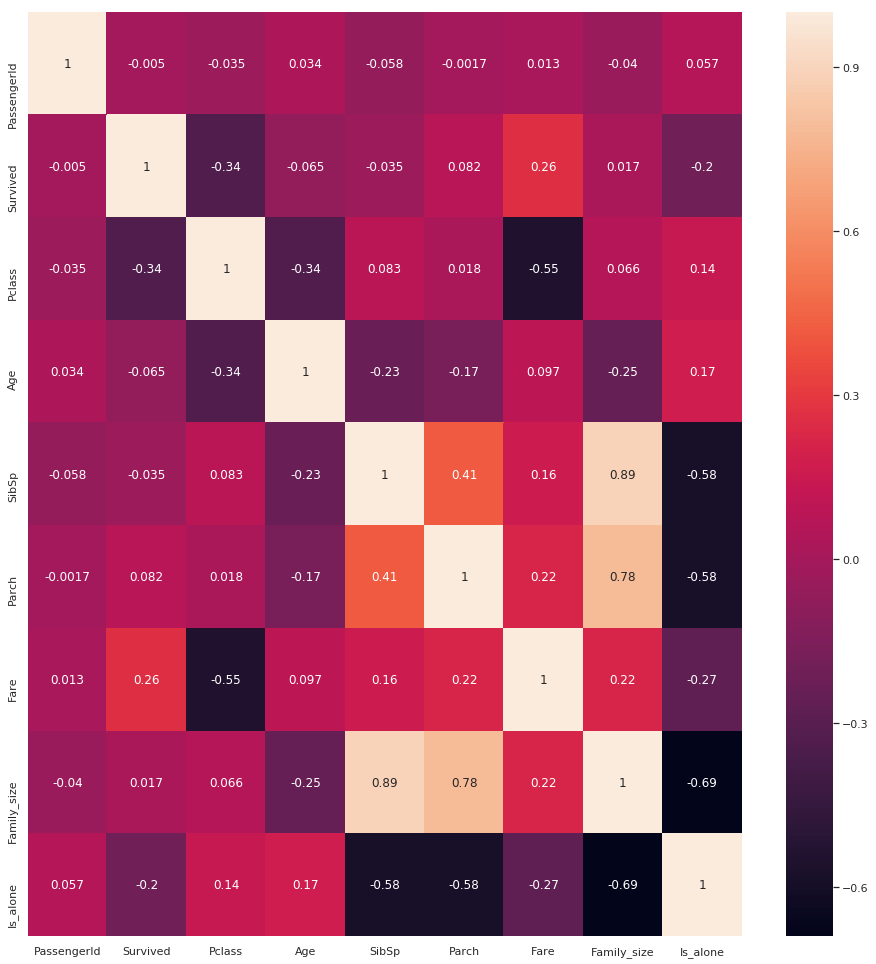

In [501]:
plt.figure(figsize=(16,17))

corrMatrix = train_df.corr()
sns.heatmap(corrMatrix, annot=True)

plt.show()

In [502]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Family_size',
       'Is_alone', 'Title', 'binned_age'],
      dtype='object')

In [503]:
to_drop = ['Age', 'PassengerId', 'Name', 'Ticket', 'Cabin']

In [504]:
train_df.dtypes

PassengerId       int64
Survived          int64
Pclass            int64
Name             object
Sex              object
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Cabin            object
Embarked         object
Family_size       int64
Is_alone          int64
Title            object
binned_age     category
dtype: object

In [505]:
for df in dfs:
    sex_encoder = LabelEncoder()
    df['sex_code'] = sex_encoder.fit_transform(df['Sex'])
    
    em_encoder = LabelEncoder()
    df['embarked_code'] = em_encoder.fit_transform(df['Embarked'])

    age_encoder = LabelEncoder()
    df['binned_age_code'] = age_encoder.fit_transform(df['binned_age'])

    title_encoder = LabelEncoder()
    df['title_code'] = title_encoder.fit_transform(df['Title'])
    

In [506]:
for df in dfs:
    fare = np.array(df['Fare']).reshape(-1,1)
    df['scaled_fare'] = scale(fare)

In [507]:
train_df.columns.tolist()

['PassengerId',
 'Survived',
 'Pclass',
 'Name',
 'Sex',
 'Age',
 'SibSp',
 'Parch',
 'Ticket',
 'Fare',
 'Cabin',
 'Embarked',
 'Family_size',
 'Is_alone',
 'Title',
 'binned_age',
 'sex_code',
 'embarked_code',
 'binned_age_code',
 'title_code',
 'scaled_fare']

In [508]:
final_train_df = train_df[[
 'Survived',
'PassengerId',
 'Pclass',
 'SibSp',
 'Parch',
 'scaled_fare',
 'Family_size',
 'Is_alone',
 'sex_code',
 'embarked_code',
 'binned_age_code',
 'title_code']]

final_test_df = test_df[[
'PassengerId',
 'Pclass',
 'SibSp',
 'Parch',
 'scaled_fare',
 'Family_size',
 'Is_alone',
 'sex_code',
 'embarked_code',
 'binned_age_code',
 'title_code']]

In [509]:
final_train_df

,Survived,PassengerId,Pclass,SibSp,Parch,scaled_fare,Family_size,Is_alone,sex_code,embarked_code,binned_age_code,title_code
0,0,1,3,1,0,-0.502445,2,0,1,2,0,17
1,1,2,1,1,0,0.786845,2,0,0,0,3,18
2,1,3,3,0,0,-0.488854,1,1,0,2,1,14
3,1,4,1,1,0,0.420730,2,0,0,2,2,18
4,0,5,3,0,0,-0.486337,1,1,1,2,2,17
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,887,2,0,0,-0.386671,1,1,1,2,1,23
887,1,888,1,0,0,-0.044381,1,1,0,2,0,14
888,0,889,3,1,2,-0.176263,4,0,0,2,1,14
889,1,890,1,0,0,-0.044381,1,1,1,0,1,17


In [510]:
# Setting features and targets
features = final_train_df.drop(labels=['Survived','PassengerId'], axis=1)
target = final_train_df['Survived']

In [511]:
# Converting Dataframes to nd arrays for the neural network
features = features.to_numpy()
target = target.to_numpy()

# convert test data into nd array
final_test_df = final_test_df.to_numpy()

In [512]:
# Split into training and validation
x_train, x_test, y_train, y_test= train_test_split(features, target, random_state=42, test_size=0.1)

In [513]:
input_size = 10
output_size = 1
hidden_layer_size = 75

max_epochs=100
batch_size=100

model = tf.keras.Sequential([
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(hidden_layer_size, activation='relu'),
    tf.keras.layers.Dense(output_size, activation='sigmoid')
])

early_stopping = tf.keras.callbacks.EarlyStopping(patience=2)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(x_train, y_train,
          verbose=2,
          epochs=max_epochs,
          callbacks=[early_stopping],
          batch_size=batch_size,
          shuffle=True,
          validation_split=0.1)

Train on 720 samples, validate on 81 samples
Epoch 1/100
720/720 - 1s - loss: 0.6690 - accuracy: 0.6056 - val_loss: 0.5831 - val_accuracy: 0.7037
Epoch 2/100
720/720 - 0s - loss: 0.6515 - accuracy: 0.6153 - val_loss: 0.6018 - val_accuracy: 0.7901
Epoch 3/100
720/720 - 0s - loss: 0.6268 - accuracy: 0.6750 - val_loss: 0.5370 - val_accuracy: 0.7160
Epoch 4/100
720/720 - 0s - loss: 0.5959 - accuracy: 0.6667 - val_loss: 0.5446 - val_accuracy: 0.7901
Epoch 5/100
720/720 - 0s - loss: 0.5837 - accuracy: 0.7153 - val_loss: 0.4803 - val_accuracy: 0.8025
Epoch 6/100
720/720 - 0s - loss: 0.5510 - accuracy: 0.7208 - val_loss: 0.4582 - val_accuracy: 0.7778
Epoch 7/100
720/720 - 0s - loss: 0.5406 - accuracy: 0.7264 - val_loss: 0.4385 - val_accuracy: 0.8148
Epoch 8/100
720/720 - 0s - loss: 0.5235 - accuracy: 0.7458 - val_loss: 0.4477 - val_accuracy: 0.8395
Epoch 9/100
720/720 - 0s - loss: 0.5166 - accuracy: 0.7403 - val_loss: 0.4010 - val_accuracy: 0.8889
Epoch 10/100
720/720 - 0s - loss: 0.4971 - acc

In [514]:
loss, acc = model.evaluate(x_test, y_test, verbose=2)
print("Loss: ", loss)
print("Accuracy: ", acc)

90/90 - 0s - loss: 0.4839 - accuracy: 0.7667
Loss:  0.48390807973013983
Accuracy:  0.76666665


In [515]:
pred=model.predict(final_test_df[:,1:])
pred=np.around(pred)

In [516]:
predictions=pd.DataFrame()
predictions['PassengerId'] = final_test_df[:,0]
predictions['Survived']= pred

In [517]:
predictions.to_csv('Submission.csv')

In [518]:
predictions

,PassengerId,Survived
0,892.0,0.0
1,893.0,1.0
2,894.0,0.0
3,895.0,0.0
4,896.0,1.0
...,...,...
413,1305.0,0.0
414,1306.0,1.0
415,1307.0,0.0
416,1308.0,0.0
